# CHAPTER 3: Linear Regression

Useful definitions:

- Standard Error of a statistic: standard deviation of its sampling distribution (or an estimate of it)

A common source of confusion occurs when failing to distinguish clearly between the standard deviation of the population, the standard deviation of the sample, the standard deviation of the mean itself, which is the standard error, and the estimator of the standard deviation of the mean, which is the most often calculated quantity, and is also often colloquially called the standard error. 

## Simple Linear Regression

Predicting a quantitative response $Y$ on the basis of a single predictor variable $X$, assuming a linear relationship:
$$
Y \sim \beta_{0} + \beta_{1}X
$$

Using training data we find estimates for the coefficient and we can predict a response value using $x$ with the formula $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1x$.

### Estimating the coefficients

There are many ways to estimate the coefficients using training data, we now see the least squares criterion: using the above 
formula with point $x_i$, we have that 

$e_i = y_i - \hat{y}_i$

is the $i$-th residual, and we define the residual sum of squares as $RSS = e_1^2  +  ...  +  e_n^2$.

After some computation, one can show that the coefficients that minimize the $RSS$ are:

- $\hat{\beta}_1 = \dfrac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}$,

- $\hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}$.

### Assessing the accuracy of the Coefficient Estimates

The population regression line is $Y = \beta_{0} + \beta_{1}X + \epsilon$.

Analogy between :
- the computed regression line and the population regression line

vs

- the sample mean and the population mean

e.g., we know that the variance of $\hat{\mu}$ is $\text{Var}(\hat{\mu}) = SE(\hat{\mu})^2 = \dfrac{\sigma^2}{n}$, where $\sigma$ is the standard deviation of the response training data. The standard error tells how much on average the estimated mean differs from the population mean.
Analogously, the standard errors of the estimated coefficients are:

- $SE(\hat{\beta}_0)^2 = \sigma^2\left[\dfrac{1}{n} + \dfrac{\bar{x}^2}{\sum(x_i-\bar{x})^2}\right]$,
- $SE(\hat{\beta}_1)^2 = \dfrac{\sigma^2}{\sum(x_i-\bar{x})^2}$,

where $\sigma^2 = \text{Var}(\epsilon)$. The errors $e_i$ for each observation should be uncorrelated and have common variance, but the formula remains a good approximation.

Generally, $\sigma^2$ is unknown. The estimate of $\sigma$ is called the **residual standard error**: $RSE = \sqrt{\dfrac{RSS}{n-2}}$

#### Use of standard error for Confidence Intervals and Hypothesis Testing

95% confidence interval of $\hat{\beta}_1$ is approximately $\hat{\beta}_1 \pm 2 \cdot SE(\hat{\beta}_1)$, and the same holds for $\hat{\beta}_0$.

Hypothesis test on the coefficients, where null hypothesis is: NO relationship between $X$ and $Y$, corresponding to $\beta_1 = 0$.
To test the null hypothesis, we need to determine whether $\hat{\beta}_1$, our estimate for $\beta_1$, is sufficiently far from zero that we can be confident that $\beta_1$ is non-zero. To do so, a $t$-statistic is computed, 
$$
t = \dfrac{\hat{\beta}_1 - 0}{SE(\hat{\beta}_1)},
$$
which measures the number of standard deviations that $\hat{\beta}_1$ is away from 0. If there is a relationship, we expect the equation above to have a $t$-distributon with $n-2$ degrees of freedom, so it is a matter of computing the probability of observing any number $>= |t|$, assuming that $\beta_1 = 0$, and this probability is called $p$-value. If the $p$-value is sufficiently small, we can reject the null hypothesis

### Assessing the accuracy of the Model

The extent to which the model fits the data; the quality of a linear regression fit is usually assessed using the **residual standard error** (RSE) and the $R^2$ statistic.

- The RSE is an estimate of the standard deviation of $\epsilon$, roughly speaking, it is the average amount that the response will deviate from the true regression line. Another way to think about this is that even if the model were correct and the true values of the unknown coefficients $\beta_0$ and $\beta_1$ were known exactly, any prediction would still be off by the RSE.

- $R^2 = \dfrac{\text{TSS - RSS}}{\text{TSS}} = 1- \dfrac{\text{RSS}}{\text{TSS}}$, where TSS = $\sum(y_i - \bar{y})^2$. TSS measures the total variance in the response $Y$, and can be thought of as the amount of variability inherent in the response before the regression is performed. In contrast, RSS measures the amount of variability that is left unexplained after performing the regression. Hence, TSS − RSS measures the amount of variability in the response that is explained (or removed) by performing the regression, and $R^2$ measures the proportion of variability in $Y$ that can be explained using $X$.

Only in the simple linear regression, $R^2 = r^2$, where $r$ is the sample correlation between $X$ and $Y$.

## Multiple Linear Regression

$Y = \beta_0 + \beta_1X_1 + ... + \beta_pX_p + \epsilon$

We interpret $\beta_j$ as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed.
Coefficients are estimated as before, i.e. we choose $\hat{\beta}_j$'s that minimize the RSS, but with more complicated linear algebra formulas.

**ATTENTION!** The simple and multiple regression coefficients can be quite different: this can happen before a variable, considered alone in the simple linear regression, can take credit for the effects of another correlated variable, but these effects vanish in the multiple regression case. For instance:

- shark_attacks = $\beta_0 + \beta_1 *$ice_cream_sales

- shark_attacks = $\beta_0 + \beta_1 *$ice_cream_sales + $\beta_2 *$temperature

In the first case, ice_cream_sales would be significant, but not in the second case, where temperature would.

## Is there a relationship between the response and the predictors?

This time, the null and alternative hypotheses become:

$$
\beta_1 = \beta_2 = ... = \beta_p = 0 \text{ ------ vs ------  At least one } \beta_j \text{ is different from zero}
$$

We compute the $F$-statistic:

$$
F = \dfrac{(\text{TSS} - \text{RSS})/p}{\text{RSS}/(n-p-1)}
$$

If the linear assumptions are correct, the expected value of the denominator is equal to $\sigma^2$. If the null hypothesis is true, also the numerator's expected value is equal to $\sigma^2$, so we expect to see a $F$-score close to 1 when there is no relationship. To test this, if the null hypothesis is true, the $F$-statistic follows an $F$-distribution, so we can compute the $p$-value.

We can also test a subset of predictors (see book for details). The $p$-values found for each individual predictor are equivalent to the $F$-test where that predictor is omitted from the model, so it reports its partial effect.

So, why do we need the overall $F$-statistic? Because, when the number of predictors is large, we could find some of them to be deemed relevant by chance, while the $F$-statistic isn't affected by this problem, since it adjusts for the number of predictors. When $p$ is very large, some special considerations need to be made.

### What variables are important? 
More details in chapter 6.

Mallow’s Cp, Akaike information criterion (AIC), Bayesian information criterion (BIC), and adjusted $R^2$

- Forward selection

- Backward selection

- Mixed selection

### How well does the model fit the data?

RSE and $R^2$, as in the simple linear regression, in particular $RSE = \sqrt{\dfrac{RSS}{n-p-1}}$.

$R^2$ will always increase when variables are added to the model, even if those variables are only weakly associated with the response. This is due to the fact that adding another variable to the least squares equations must allow us to fit the training data (though not necessarily the testing data) more accurately.

### How can we predict new values?

...

### Other considerations

Use dummy variables to account for categorical/qualitative variables:
- binary variable -> one dummy variable
- $n$-ary variable -> $n-1$ dummy variables
   

e.g. Red, Blue, White -> a) Red, not Red  and b) Blue, not Blue

Two of the most important assumptions state that the relationship between the predictors and response are additive and linear. The additive assumption means that the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors. The linear assumption states that the change in the response $Y$ due to a one-unit change in $X_j$ is constant, regardless of the value of $X_j$.


#### Additive

To relax the additive assumptions, we can add an interaction term, e.g.

$$
Y = \beta_0 +\beta_1X_1 +\beta_2X_2 +\beta_3X_1X_2 +\epsilon \\ = \beta_0 + (\beta_1 + \beta_3X_2)X_1 +\beta_2X_2 +\epsilon \\ = \beta_0 + \tilde{\beta}_1X_1 +\beta_2X_2 +\epsilon,
$$

where now a change in $X_2$ will modify the contribution of $X_1$, too.

The **hierarchical principle** states that if we include an interaction in a model, we should also include the main effects, even if the $p$-values associated with their coefficients are not significant.

#### Linear

More details in chapter 7.

Polynomial regression is still a linear regression model, because it is linear in the coefficients

### Potential problems

####  Non-linearity of the response-predictor relationships.

Use residual plots (either residuals $e_i$ vs predictors $x_i$ in the simple case, or residuals $e_i$ vs predicted $\hat{y}_i$ in the multiple case). There should be no discernible pattern.

#### Correlation of error terms

It frequently happens in time series data. 

#### Non-constant variance of errors

Funnel shape in the residual plot

#### Outliers
Unusual value of $e_i$

#### High leverage points
Unusual value of $x_i$

#### Collinearity
- Power of the hypothesis test (the probability of correctly detecting a non-zero coefficient) is reduced by collinearity.
- Variance inflation factor (VIF) to detect multicollinearity.
- Drop all but one correlated variables or merge them.

### Comparison with KNN-regressor

- the parametric approach will outperform the non-parametric approach if the parametric form that has been selected is close to the true form of $f$.
- As a general rule, parametric methods will tend to outperform non-parametric approaches when there is a small number of observations per predictor.
- In higher dimensions, KNN often performs worse than linear regression due to the curse of dimensionality.
- Even in problems in which the dimension is small, we might prefer linear regression to KNN from an interpretability standpoint.

# LAB

In [1]:
# install.packages("ISLR")
library('MASS')
library('ISLR')

In [3]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [9]:
dim(Boston)

[1] 506  14

In [13]:
dim(na.omit(Boston))

[1] 506  14

In [18]:
attach(Boston)

In [5]:
# median house value using lstat: percent of households with low socioeconomic status
lm.fit = lm(medv~lstat, data=Boston)

In [7]:
print(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



In [11]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [14]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [15]:
predict(lm.fit,
        data.frame(lstat=c(5, 10, 15)), 
        interval="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [16]:
predict(lm.fit,
        data.frame(lstat=c(5, 10, 15)), 
        interval="prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


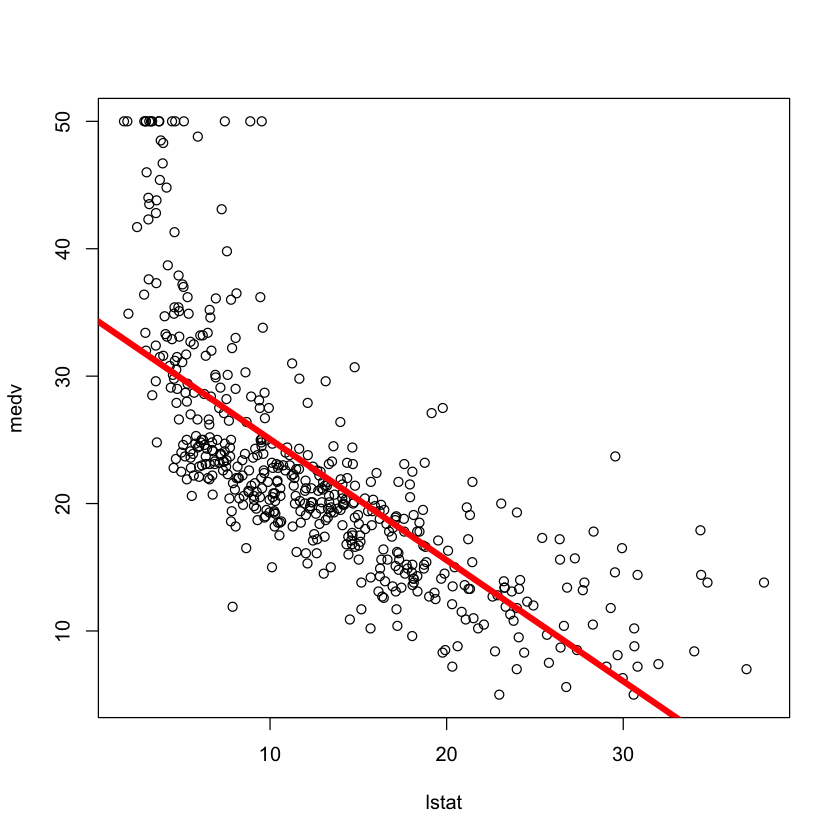

In [36]:
par(bg = 'white')
plot(lstat, medv)
abline(lm.fit, lwd=5, col="red") # plot regression line

In [58]:
bu = predict(lm.fit,
         data.frame(lstat=lstat))

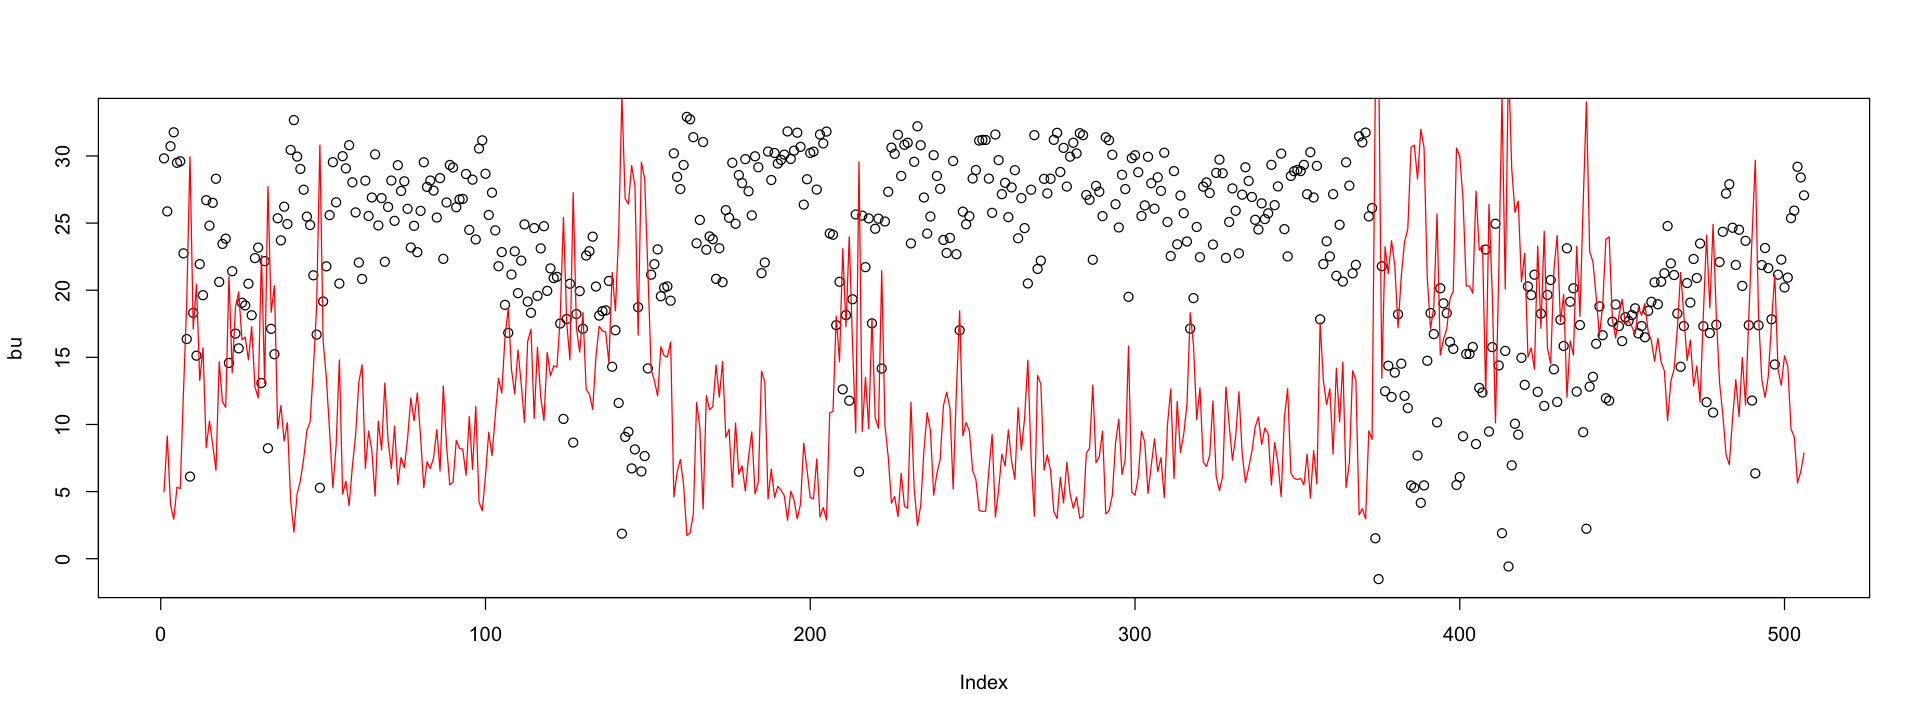

In [68]:
par(bg = 'white')
plot(bu)
lines(lstat, col="red")

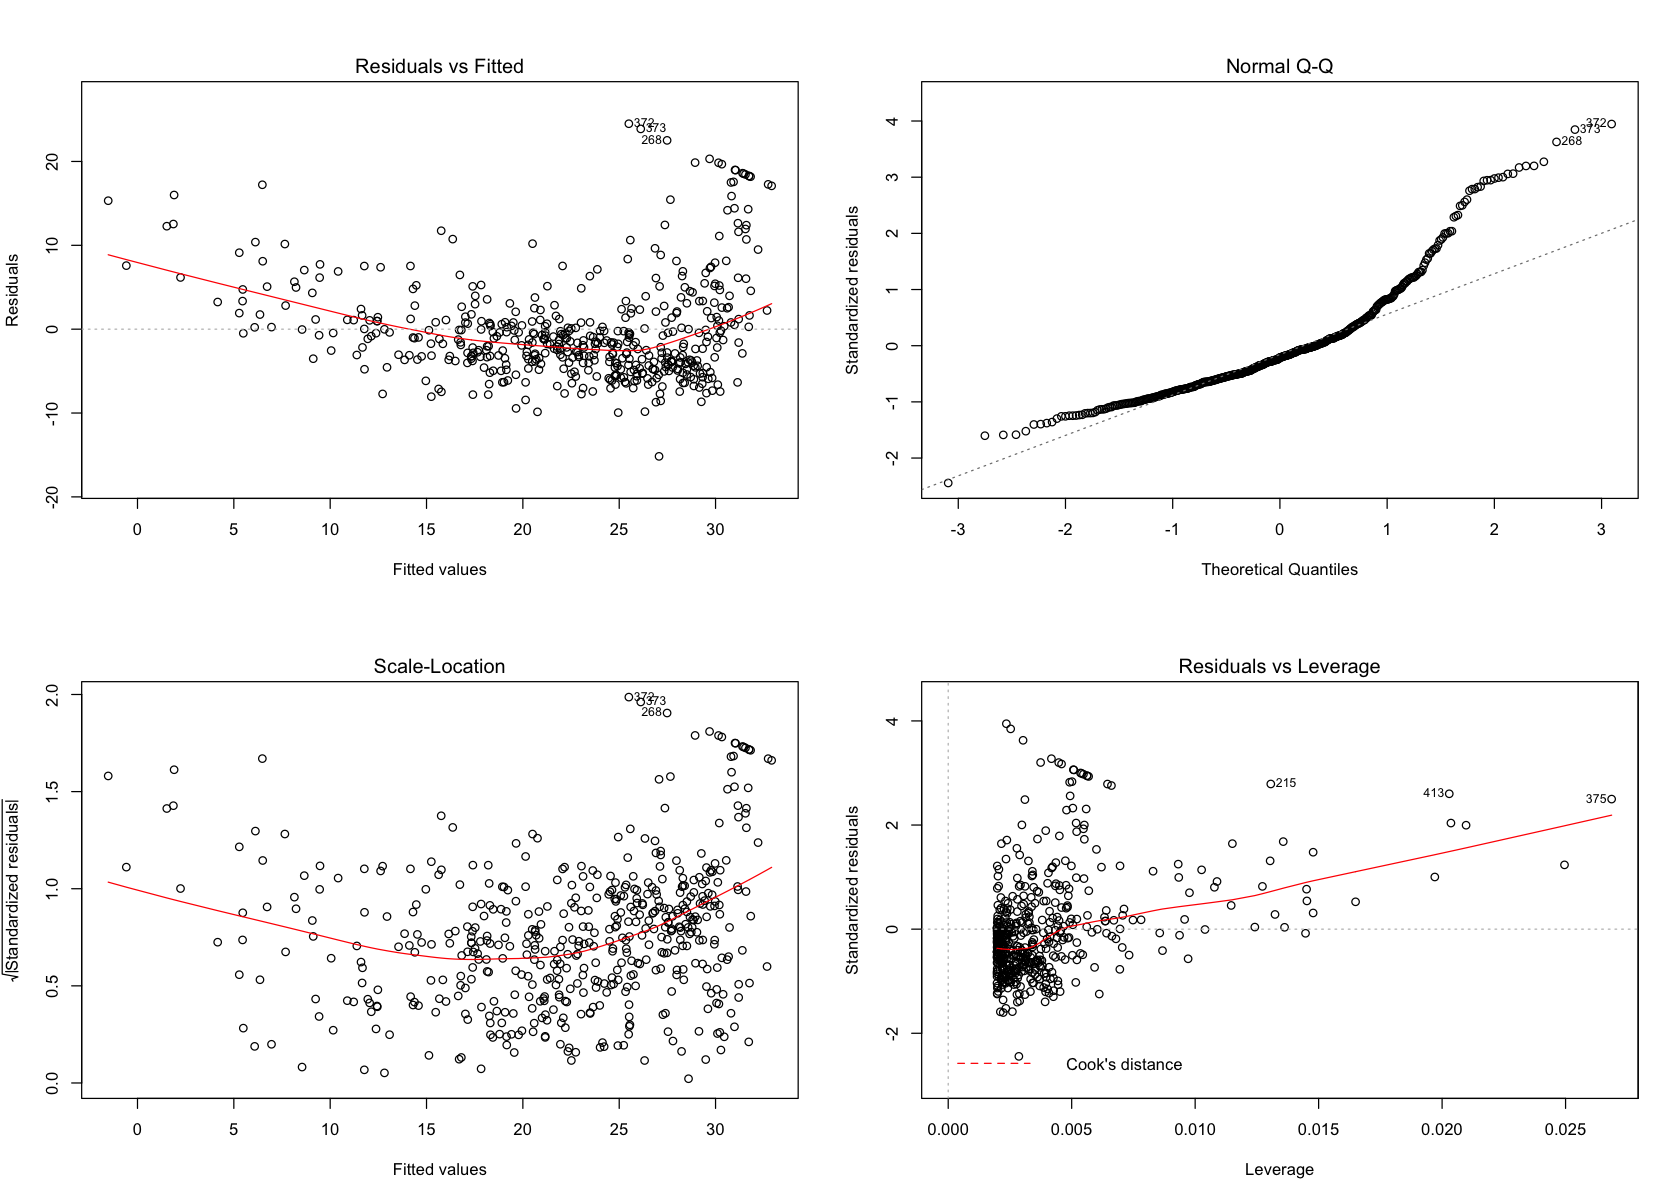

In [41]:
options(repr.plot.width=14, repr.plot.height=10)
par(mfrow=c(2,2), bg="white")
plot(lm.fit)
# fitted values (x axis) mean predictions, see
# summary(predict(lm.fit,
#         data.frame(lstat=lstat)))

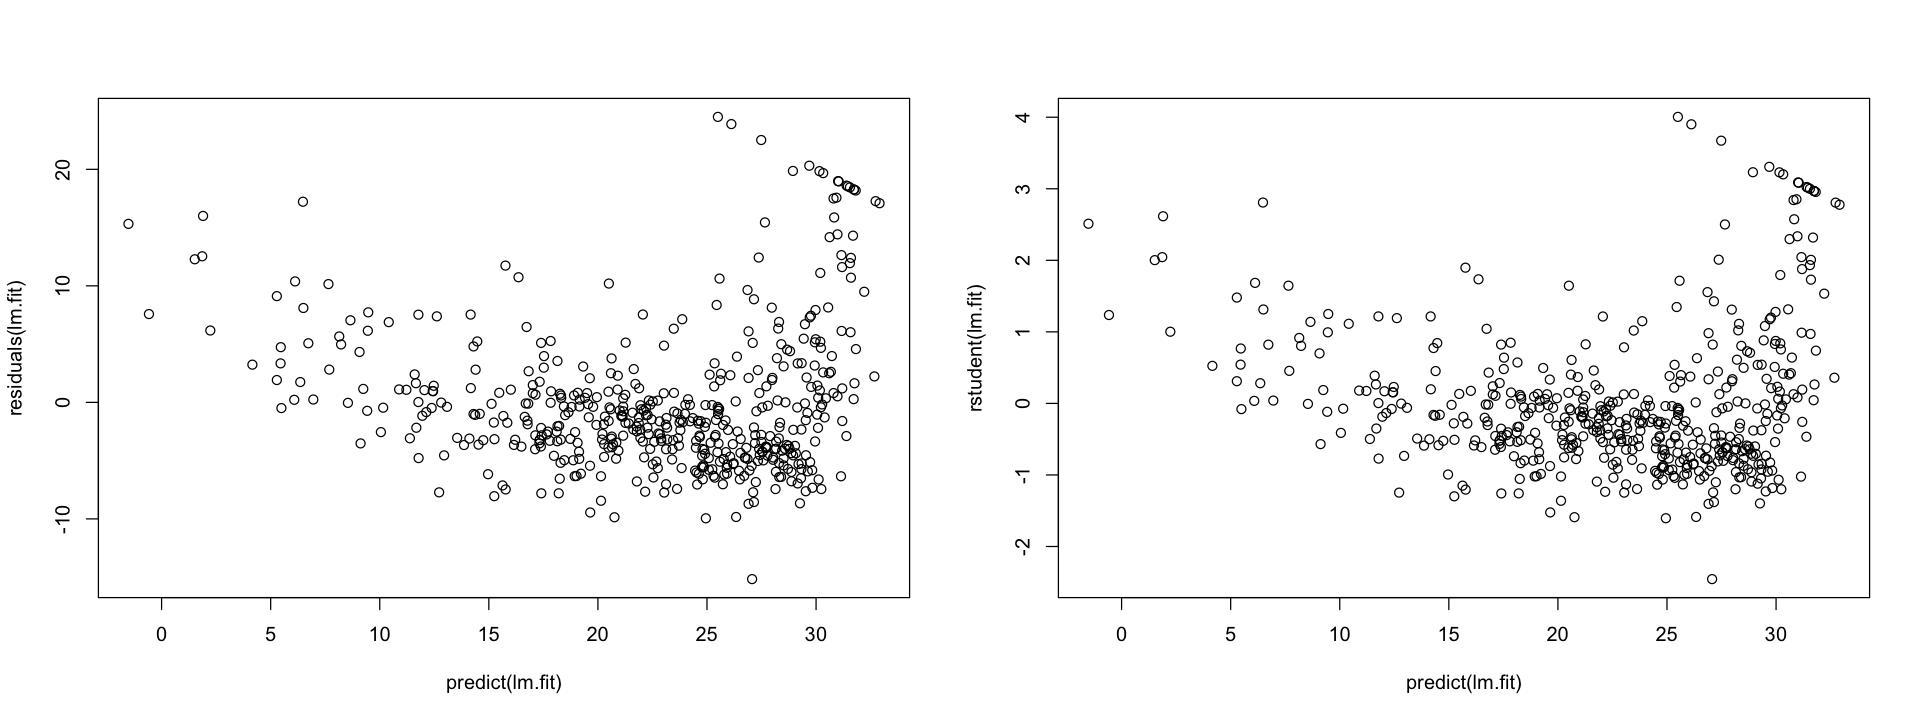

In [46]:
options(repr.plot.width=16, repr.plot.height=6)
par(mfrow=c(1, 2), bg="white")
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

In [69]:
lm.fit=lm(medv~lstat+age, data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [70]:
lm.fit = lm(medv~., data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [74]:
#install.packages("car")
library(car)
print(vif(lm.fit))

    crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491 


In [75]:
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [76]:
lm.fit2=lm(medv~lstat+I(lstat^2))

In [77]:
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [78]:
lm.fit=lm(medv~lstat)
anova(lm.fit,lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


The anova() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors `lstat` and `lstat^2` is far superior to the model that only contains the predictor `lstat`.

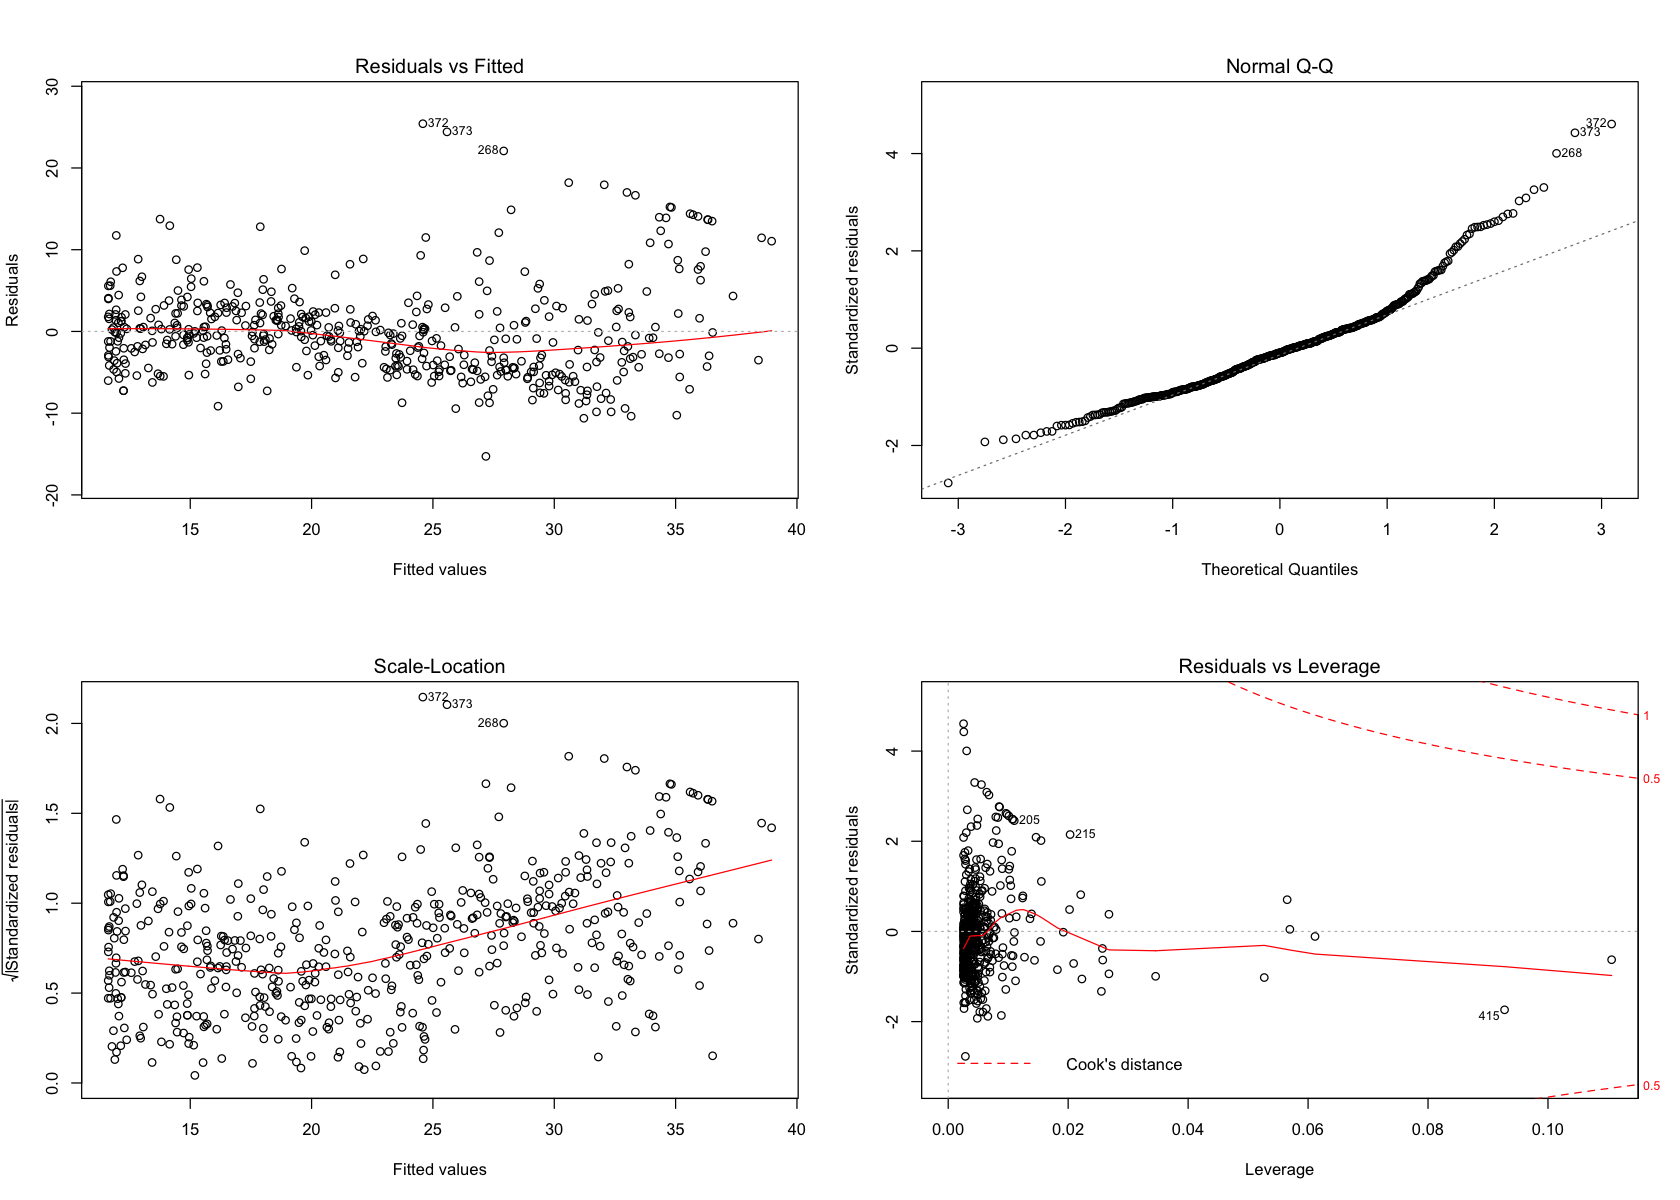

In [80]:
options(repr.plot.width=14, repr.plot.height=10)
par(mfrow=c(2, 2), bg="white")
plot(lm.fit2)

In [81]:
lm.fit5=lm(medv~poly(lstat,5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


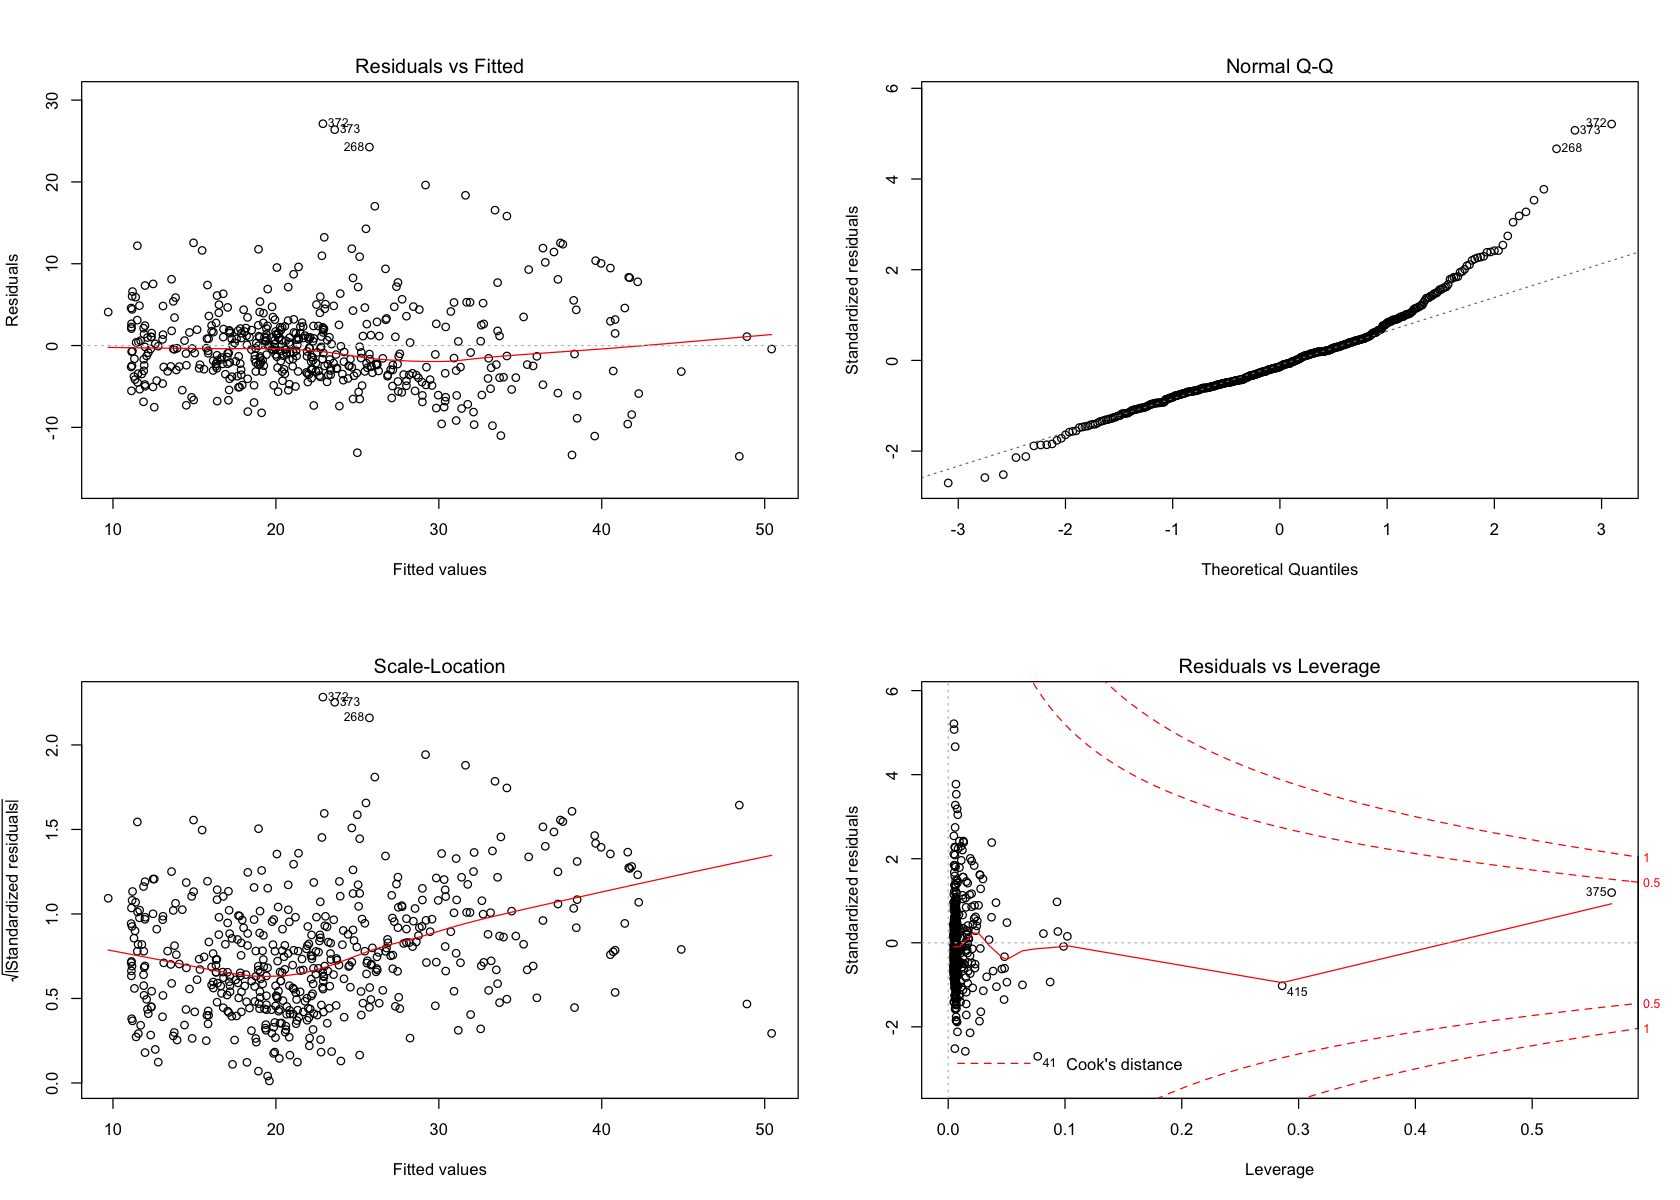

In [82]:
options(repr.plot.width=14, repr.plot.height=10)
par(mfrow=c(2, 2), bg="white")
plot(lm.fit5)

In [83]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

In [84]:
ls()

[1] "Boston"  "bu"      "lm.fit"  "lm.fit2" "lm.fit5"

In [86]:
LETTERS[1]

[1] "A"

In [91]:
print(ls("package:ISLR"))

 [1] "Auto"      "Caravan"   "Carseats"  "College"   "Credit"    "Default"  
 [7] "Hitters"   "Khan"      "NCI60"     "OJ"        "Portfolio" "Smarket"  
[13] "Wage"      "Weekly"   


In [92]:
print(ls("package:car"))

  [1] "Anova"                    "Boot"                    
  [3] "Boxplot"                  "Confint"                 
  [5] "Export"                   "Identify3d"              
  [7] "Import"                   "Manova"                  
  [9] "Predict"                  "Recode"                  
 [11] "S"                        "Tapply"                  
 [13] "adaptiveKernel"           "av.plot"                 
 [15] "av.plots"                 "avPlot"                  
 [17] "avPlots"                  "basicPower"              
 [19] "basicPowerAxis"           "bc"                      
 [21] "bcPower"                  "bcPowerAxis"             
 [23] "bcnPower"                 "bcnPowerAxis"            
 [25] "bcnPowerInverse"          "bootCase"                
 [27] "box.cox"                  "box.cox.powers"          
 [29] "box.cox.var"              "box.tidwell"             
 [31] "boxCox"                   "boxCox2d"                
 [33] "boxCoxVariable"           "boxTid

In [94]:
lm.fit = lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit) 


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

In [95]:
attach(Carseats)
contrasts(ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


In [100]:
prova = function() print("bufu")

provaz = function(){ 
    print("mona")
return}